In [70]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [71]:
num_points = 500
X, Y = datasets.make_circles(n_samples = num_points, random_state = 123, noise = 0.1, factor = 0.2)

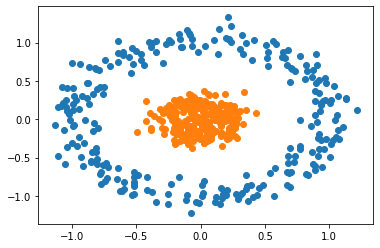

In [72]:
plt.scatter(X[Y==0, 0], X[Y==0, 1])
plt.scatter(X[Y==1, 0], X[Y==1, 1])

In [73]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.01), 'binary_crossentropy', metrics=['accuracy'])

In [74]:
h = model.fit(x=X, y=Y, verbose = 1, batch_size=20, epochs=100, shuffle='true')

Epoch 1/100
500/500 [==============================] - 0s 228us/step - loss: 0.7103 - accuracy: 0.4020
Epoch 2/100
500/500 [==============================] - 0s 48us/step - loss: 0.6964 - accuracy: 0.6440
Epoch 3/100
500/500 [==============================] - 0s 50us/step - loss: 0.6949 - accuracy: 0.5920
Epoch 4/100
500/500 [==============================] - 0s 52us/step - loss: 0.6939 - accuracy: 0.5220
Epoch 5/100
500/500 [==============================] - 0s 48us/step - loss: 0.6932 - accuracy: 0.4520
Epoch 6/100
500/500 [==============================] - 0s 50us/step - loss: 0.6923 - accuracy: 0.6180
Epoch 7/100
500/500 [==============================] - 0s 48us/step - loss: 0.6916 - accuracy: 0.5120
Epoch 8/100
500/500 [==============================] - 0s 48us/step - loss: 0.6907 - accuracy: 0.6640
Epoch 9/100
500/500 [==============================] - 0s 50us/step - loss: 0.6894 - accuracy: 0.6700
Epoch 10/100
500/500 [==============================] - 0s 48us/step - loss: 0.68

Text(0.5, 1.0, 'Accuracy')

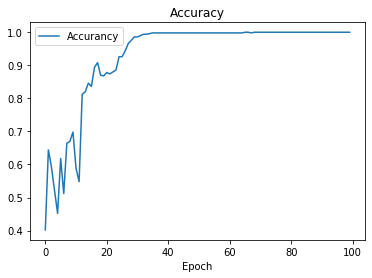

In [75]:
plt.plot(h.history['accuracy'])
plt.xlabel('Epoch')
plt.legend(['Accurancy'])
plt.title('Accuracy')

Text(0.5, 1.0, 'Loss')

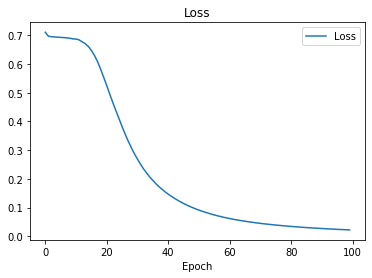

In [76]:
plt.plot(h.history['loss'])
plt.xlabel('Epoch')
plt.legend(['Loss'])
plt.title('Loss')

In [77]:
def plot_decision_boundary(X, Y, model):
    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25, 50)
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

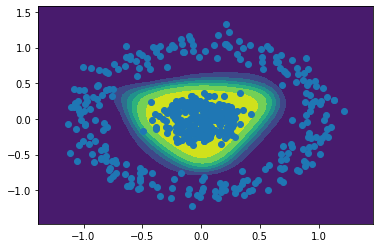

In [78]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[:num_points,0], X[:num_points,1])
plt.scatter(X[num_points:,0], X[num_points:,1])

[[0.9883256]]


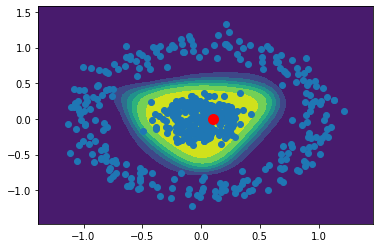

In [79]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[:num_points,0], X[:num_points,1])
plt.scatter(X[num_points:,0], X[num_points:,1])
x = 0.1
y = 0.0
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='red')
print(prediction)